Here we call the MNIST dataset, train the model and lastly compile the model

11493376/11490434 [==============================] - 0s 0us/step


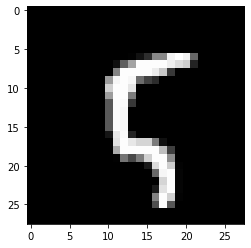

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 9, 32)          320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 64)          18496     
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1000)              65000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0

In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D,Convolution2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape
X_test.shape
import matplotlib.pyplot as plt
plt.imshow(X_train[100],cmap='gray')
plt.show()
y_train[100]
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

#feature scaling
X_train = X_train.astype('float')
X_test = X_test.astype('float')

X_train /=255
X_test /=255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_train[:3]

##building the model

model = Sequential()  #create an object for this seq. 
model.add(Convolution2D(32,3,3,activation='relu',input_shape=(28,28,1)))  # first conv. layer
#no_filter,filter_size,a_f,input_shape
model.add(MaxPooling2D(2,2))   #max pooling layer
model.add(Convolution2D(64,3,3,activation='relu'))   #second conv. layer
model.add(Dropout(0.25))     # dropout layer
model.add(Flatten())      
model.add(Dense(1000,activation='relu'))   #first hidden layer
model.add(Dropout(0.5))   ## dropout layer
model.add(Dense(10,activation='softmax'))  #output layer
model.summary()

#compiling the model

from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), 
              metrics=['accuracy'])
train_gen = ImageDataGenerator(shear_range=.2,
                               rotation_range=20,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               zoom_range=.2,
                               horizontal_flip=True)
#training the model

test_gen = ImageDataGenerator()
train_generator = train_gen.flow(X_train, y_train, batch_size=64)
test_generator = test_gen.flow(X_test, y_test, batch_size=64)
model.fit_generator(train_generator,steps_per_epoch=60000/64,
                    epochs=15,
                    validation_data=test_generator,
                    validation_steps=10000/64)

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_train[:3]  #i perhaps erased the the output of this syntax due to a bit of haste

here we test the model by its accuracy score

In [30]:
model.save('mnist_cnn.h5')  
from keras.models import load_model
loaded_model = load_model('mnist_cnn.h5')

score = model.evaluate(X_test, y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3764 - accuracy: 0.8817

Test accuracy:  0.8816999793052673


next we import the image in 'img' and then plot it in graph

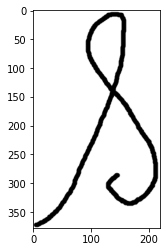

In [54]:
import cv2   
import matplotlib.pyplot as plt

##to import img in google collab use this code
#from google.colab import files
#from io import BytesIO
#from PIL import Image

#uploaded = files.upload()
#im = Image.open(BytesIO(uploaded['Image_file_name.jpg'])) ##specifiy the image name in sqaure brackets

img=cv2.imread('sha.png')
img.shape
plt.imshow(img,cmap='gray')


Invert the image's color

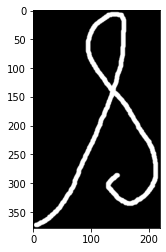

In [55]:
img = np.invert(img)
plt.imshow(img,cmap='gray')

Here we alter the dimesions of the image to check the model

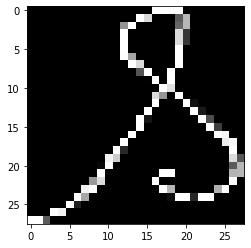

In [56]:
img = cv2.resize(img, (28, 28))
img.shape
plt.imshow(img,cmap='gray')

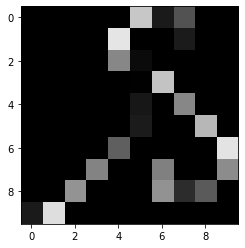

In [57]:
img = cv2.resize(img, (10, 10))
img.shape
plt.imshow(img,cmap='gray')

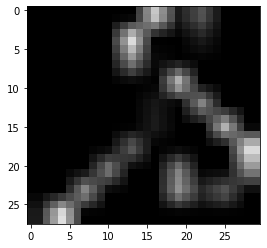

In [58]:
img = cv2.resize(img, (30, 28))
img.shape
plt.imshow(img,cmap='gray')